### This is a simple ML project where i am going to predict best selling car price based on previous selling price datasets
### The dataset contains informations about used cars listed on www.cardekho.com
### I used Kaggle’s dataset because it had a variety of categorical and numerical data and allows you to explore   different ways of dealing with missing data

##  I divided out my project into 4 parts:
### 1-Exploratory Data Analysis
### 2-Train Model
### 3-Test Model
### 4-Deploy Model

## Step-1  EDA

In [1]:
# importing libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset using pandas
car_dekho = pd.read_csv("cardekho.csv")
car_dekho.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [3]:
car_dekho.shape

(301, 9)

In [4]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [5]:
car_dekho.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [6]:
print(car_dekho['Fuel_Type'].unique())
print(car_dekho['Seller_Type'].unique())
print(car_dekho['Transmission'].unique())
print(car_dekho['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
car_dekho.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_dekho.nunique(axis=0)

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [9]:
car_dekho.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
columns = ['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission',"Owner",'Year','Selling_Price'] 
final_data = car_dekho[columns]
final_data.head()

Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner  Year  \
0           5.59       27000    Petrol      Dealer       Manual      0  2014   
1           9.54       43000    Diesel      Dealer       Manual      0  2013   
2           9.85        6900    Petrol      Dealer       Manual      0  2017   
3           4.15        5200    Petrol      Dealer       Manual      0  2011   
4           6.87       42450    Diesel      Dealer       Manual      0  2014   

   Selling_Price  
0           3.35  
1           4.75  
2           7.25  
3           2.85  
4           4.60

In [11]:
final_data = pd.get_dummies(final_data,drop_first=True)
final_data

Present_Price  Kms_Driven  Owner  Year  Selling_Price  Fuel_Type_Diesel  \
0             5.59       27000      0  2014           3.35                 0   
1             9.54       43000      0  2013           4.75                 1   
2             9.85        6900      0  2017           7.25                 0   
3             4.15        5200      0  2011           2.85                 0   
4             6.87       42450      0  2014           4.60                 1   
..             ...         ...    ...   ...            ...               ...   
296          11.60       33988      0  2016           9.50                 1   
297           5.90       60000      0  2015           4.00                 0   
298          11.00       87934      0  2009           3.35                 0   
299          12.50        9000      0  2017          11.50                 1   
300           5.90        5464      0  2016           5.30                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1                       0                    1  
3                   1                       0                    1  
4                   0                       0                    1  
..                ...                     ...                  ...  
296                 0                       0                    1  
297                 1                       0                    1  
298                 1                       0                    1  
299                 0                       0                    1  
300                 1                       0                    1  

[301 rows x 9 columns]

In [12]:
final_data.describe()

Present_Price     Kms_Driven       Owner         Year  Selling_Price  \
count     301.000000     301.000000  301.000000   301.000000     301.000000   
mean        7.628472   36947.205980    0.043189  2013.627907       4.661296   
std         8.644115   38886.883882    0.247915     2.891554       5.082812   
min         0.320000     500.000000    0.000000  2003.000000       0.100000   
25%         1.200000   15000.000000    0.000000  2012.000000       0.900000   
50%         6.400000   32000.000000    0.000000  2014.000000       3.600000   
75%         9.900000   48767.000000    0.000000  2016.000000       6.000000   
max        92.600000  500000.000000    3.000000  2018.000000      35.000000   

       Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
count        301.000000        301.000000              301.000000   
mean           0.199336          0.794020                0.352159   
std            0.400166          0.405089                0.478439   
min            0.000000          0.000000                0.000000   
25%            0.000000          1.000000                0.000000   
50%            0.000000          1.000000                0.000000   
75%            0.000000          1.000000                1.000000   
max            1.000000          1.000000                1.000000   

       Transmission_Manual  
count           301.000000  
mean              0.867110  
std               0.340021  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

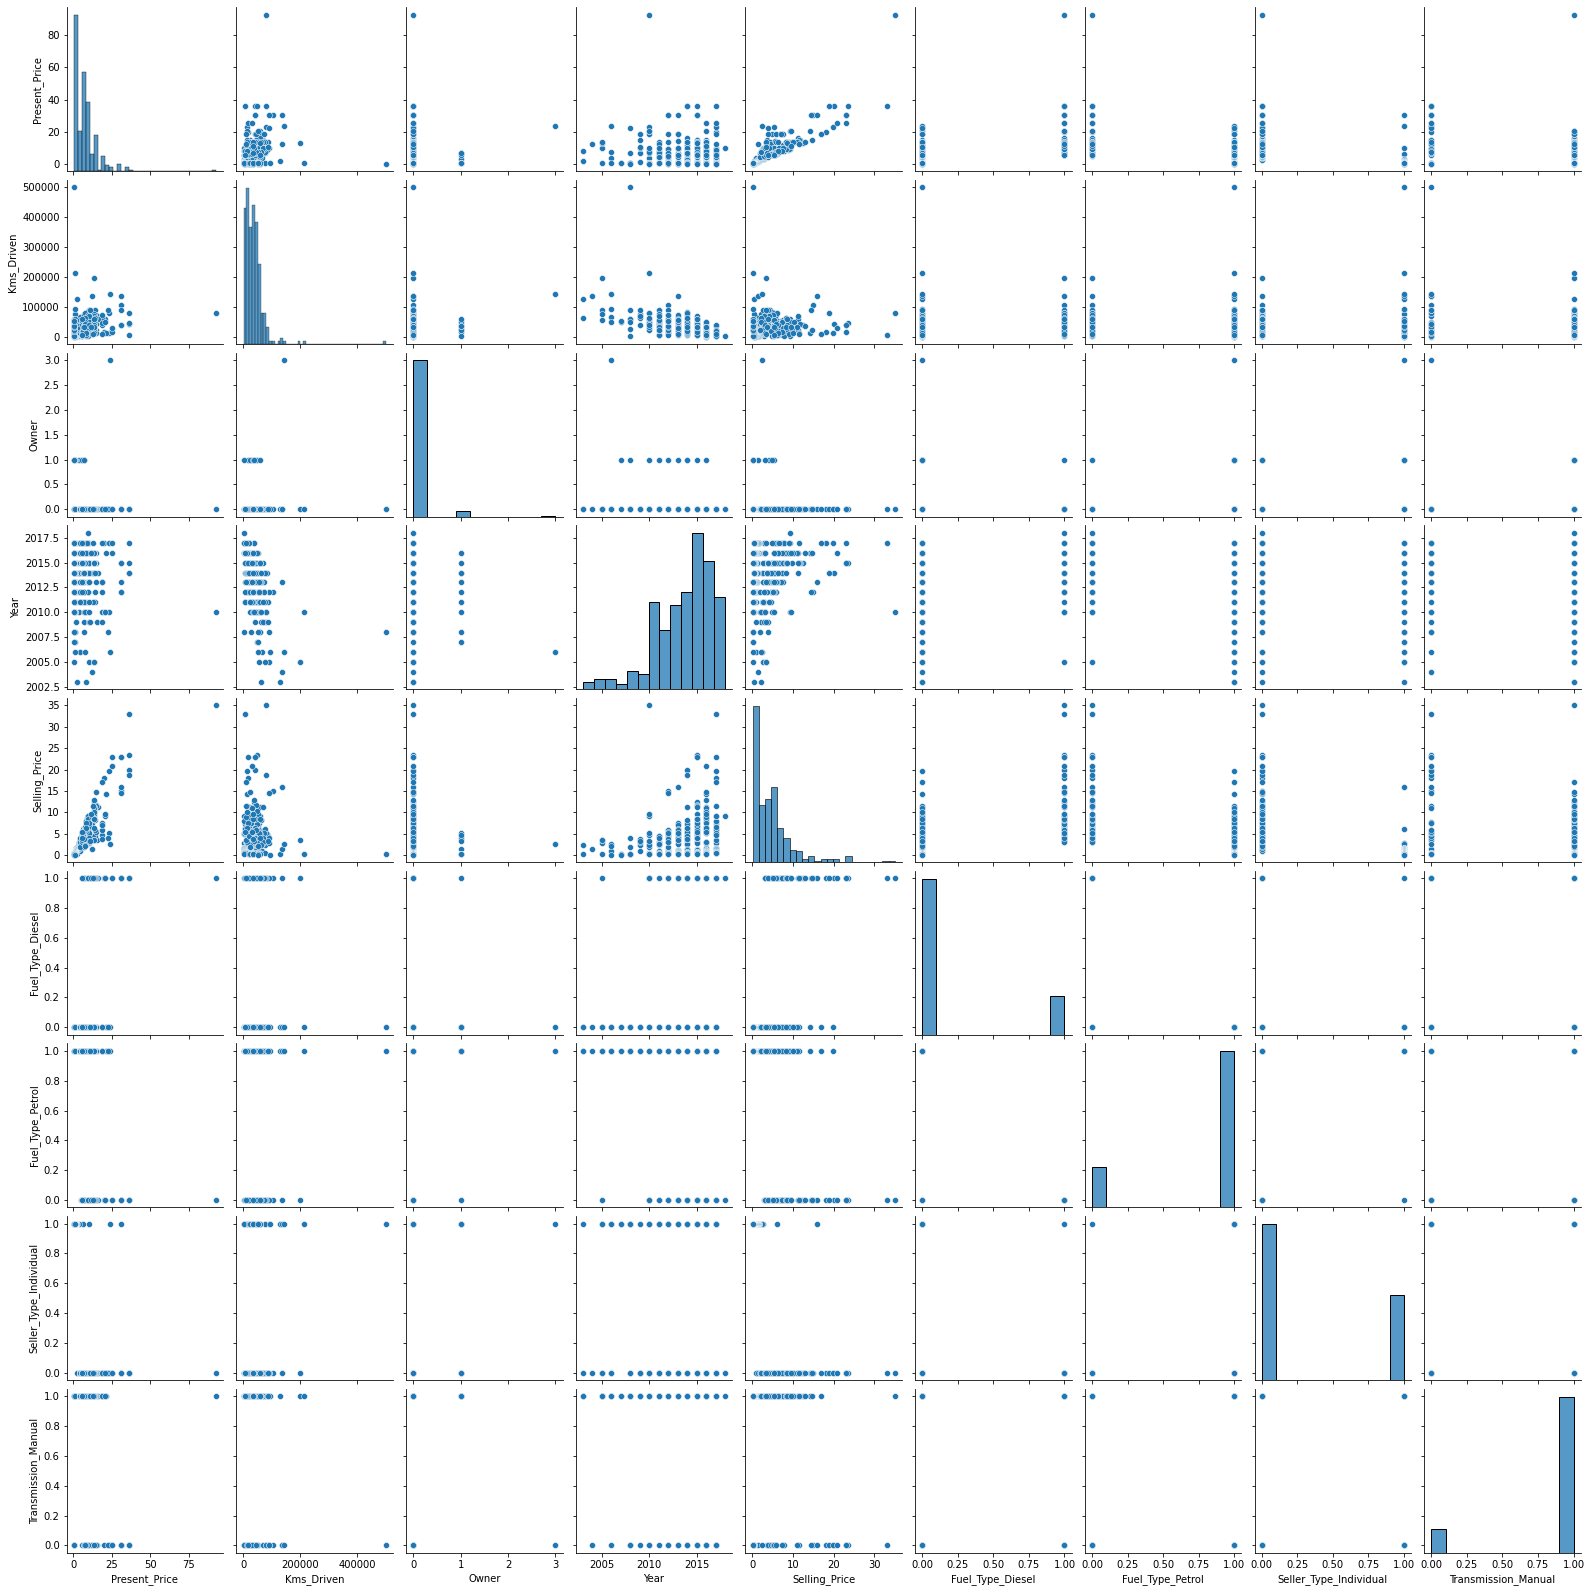

In [13]:
sns.pairplot(final_data)

In [14]:
final_data.head()

Present_Price  Kms_Driven  Owner  Year  Selling_Price  Fuel_Type_Diesel  \
0           5.59       27000      0  2014           3.35                 0   
1           9.54       43000      0  2013           4.75                 1   
2           9.85        6900      0  2017           7.25                 0   
3           4.15        5200      0  2011           2.85                 0   
4           6.87       42450      0  2014           4.60                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [15]:
final_data['No_Year'] = 2020 - final_data['Year']
final_data.head()

Present_Price  Kms_Driven  Owner  Year  Selling_Price  Fuel_Type_Diesel  \
0           5.59       27000      0  2014           3.35                 0   
1           9.54       43000      0  2013           4.75                 1   
2           9.85        6900      0  2017           7.25                 0   
3           4.15        5200      0  2011           2.85                 0   
4           6.87       42450      0  2014           4.60                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  No_Year  
0                 1                       0                    1        6  
1                 0                       0                    1        7  
2                 1                       0                    1        3  
3                 1                       0                    1        9  
4                 0                       0                    1        6

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

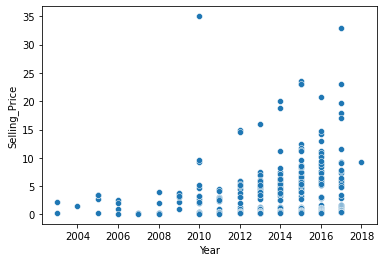

In [16]:
#corr between Year and Selling_Price
sns.scatterplot(data=final_data,x='Year',y='Selling_Price')

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

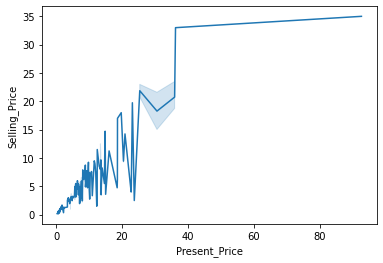

In [17]:
sns.lineplot(data=final_data,x='Present_Price',y='Selling_Price')

<AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>

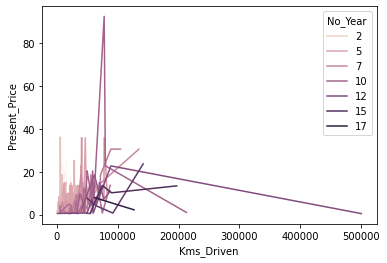

In [18]:
sns.lineplot(data=final_data,x='Kms_Driven',y='Present_Price',hue='No_Year')

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

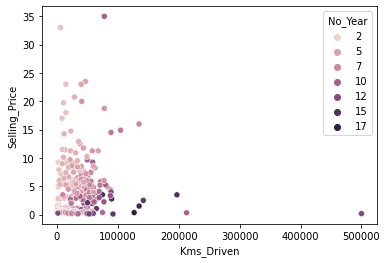

In [19]:
#corr between Kms_Driven and Selling_Price
sns.scatterplot(data=final_data,x='Kms_Driven',y='Selling_Price',hue='No_Year')

<AxesSubplot:xlabel='Owner'>

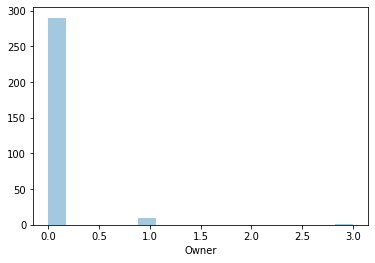

In [20]:
sns.distplot(final_data['Owner'],kde=False)

<AxesSubplot:>

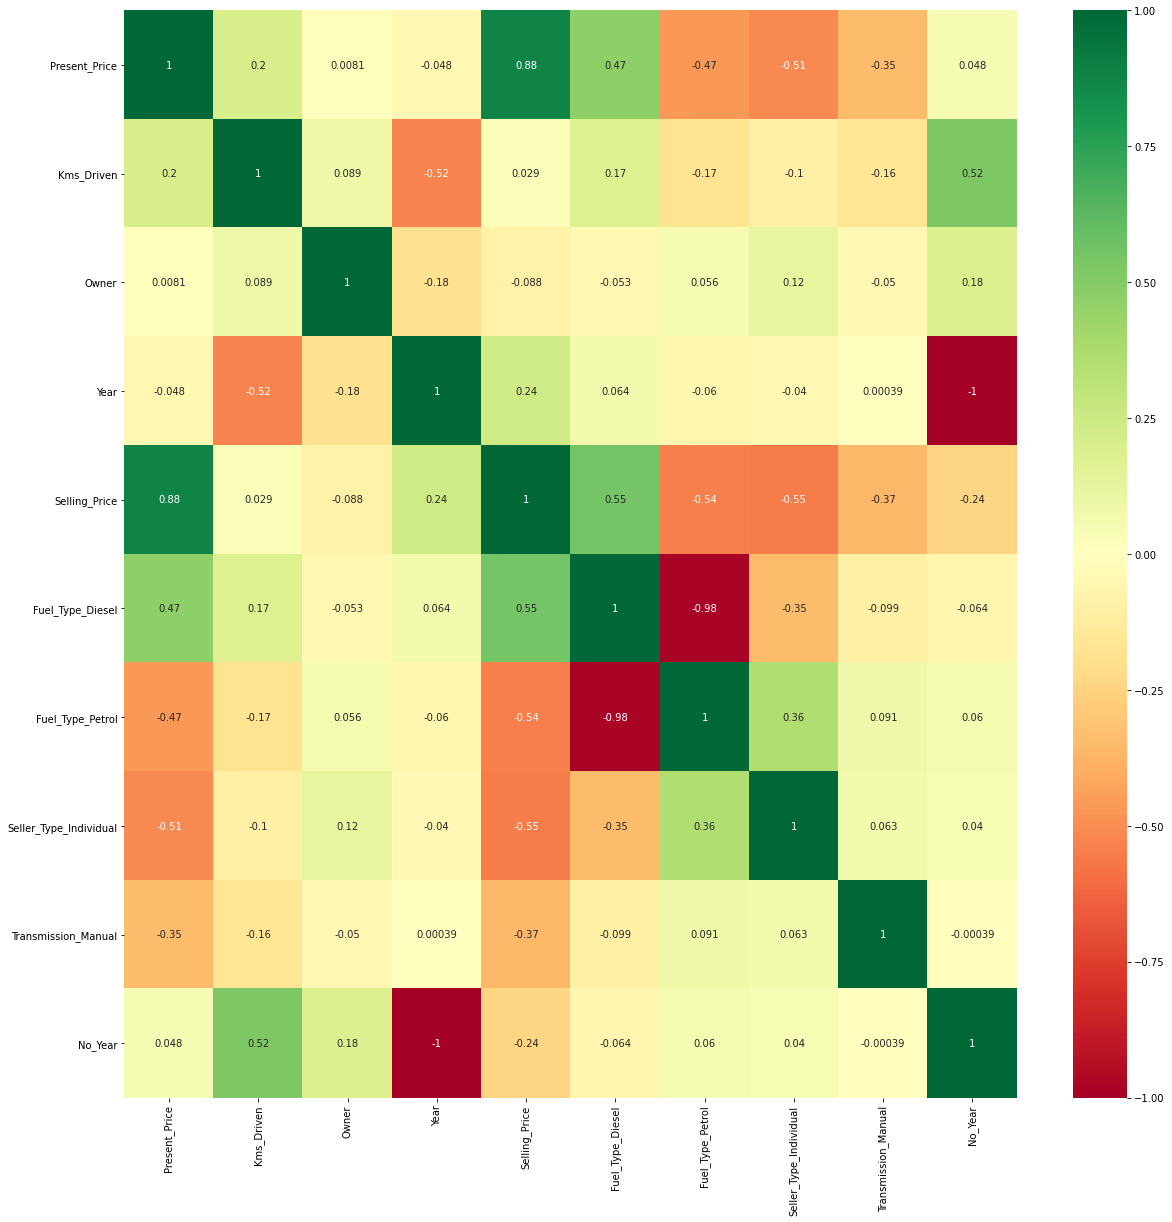

In [21]:
# Correlation Heatmap
corrmat = final_data.corr()
corr_feature = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_data[corr_feature].corr(),annot=True,cmap = 'RdYlGn')

In [22]:
# Owner feature is not Highly corr to Selling_Price
# so i decided Owner and Year feature are not part of my main features 
final_data.drop(['Owner','Year'],inplace=True,axis=1)
final_data.head()

Present_Price  Kms_Driven  Selling_Price  Fuel_Type_Diesel  \
0           5.59       27000           3.35                 0   
1           9.54       43000           4.75                 1   
2           9.85        6900           7.25                 0   
3           4.15        5200           2.85                 0   
4           6.87       42450           4.60                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  No_Year  
0                 1                       0                    1        6  
1                 0                       0                    1        7  
2                 1                       0                    1        3  
3                 1                       0                    1        9  
4                 0                       0                    1        6

## Step-2 Train Model and Step-3 Test Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
#split data into independent and Target variables
target_var = final_data['Selling_Price']
final_data.drop(['Selling_Price'],inplace=True,axis=1)
target_var

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
independent_var = final_data.copy()

In [26]:
independent_var.head()

Present_Price  Kms_Driven  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0           5.59       27000                 0                 1   
1           9.54       43000                 1                 0   
2           9.85        6900                 0                 1   
3           4.15        5200                 0                 1   
4           6.87       42450                 1                 0   

   Seller_Type_Individual  Transmission_Manual  No_Year  
0                       0                    1        6  
1                       0                    1        7  
2                       0                    1        3  
3                       0                    1        9  
4                       0                    1        6

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(independent_var,target_var,test_size=0.2)

In [41]:
# features importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,Y_train)
model.feature_importances_

array([0.4743026 , 0.03609532, 0.0424249 , 0.06848671, 0.21940849,
       0.08018589, 0.07909608])

<AxesSubplot:>

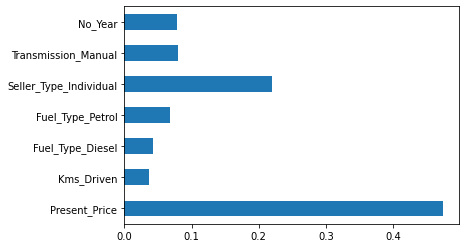

In [42]:
# plot graph of features important for better visualization
f = pd.Series(model.feature_importances_,index=X_train.columns)
f.plot(kind='barh')

In [43]:
# train a LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
model.score(X_test,Y_test)

0.8480688255885755

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

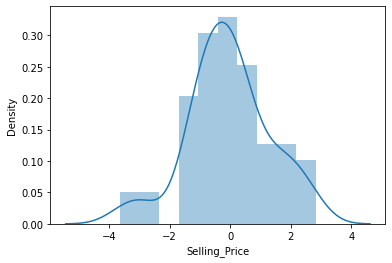

In [44]:
sns.distplot(Y_test-prediction,)

In [45]:
# Train RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=250,random_state=42)
rf_model.fit(X_train,Y_train)
prediction = rf_model.predict(X_test)
rf_model.score(X_test,Y_test)


0.9597465473158544

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

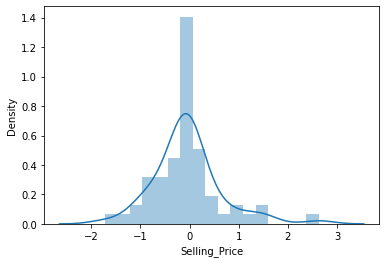

In [46]:
sns.distplot(Y_test-prediction)

In [47]:
# Train DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,Y_train)
predicted_val = dt_model.predict(X_test)
dt_model.score(X_test,Y_test)

0.9202703184803578

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

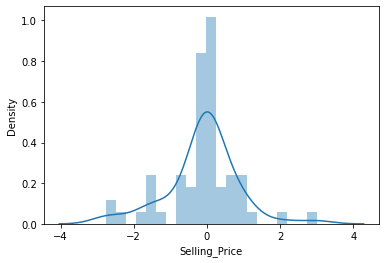

In [48]:
sns.distplot(Y_test-predicted_val)

In [49]:
# Accuracy of models
##############
##
##    LinearRegression          = > 86%
##    RandomForestRegressor     = > 95%
##    DecisionTreeRegressor     = > 94%
##
##############

In [50]:
# so i'm going to select RandomForestRegressor Model bcoz it has better accuracy score
# and it's also used multiple DecisionTree to predict values
# so i think i will give best result

# Step-4 Model Deployment

In [51]:
# import pickle for model deploment process
import pickle

In [52]:
# open a file to store model
file = open("Price_Prediction_Model.pkl",'wb')
# dump the rf_model to the file
pickle.dump(rf_model,file)